### EMNIST

1. Break the dataset down into just 60000 values and scout it out. 
2. Make system for removing bad values.
3. Remove all bad values.
4. Train on 120,000 values (half of EMNIST digits), on a validation set of MNIST. 
5. Measure performance on the MNIST test set. 

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from emnist import extract_training_samples, extract_test_samples

# This will access the 'digits' subset
images, labels = extract_training_samples('digits')
test_images, test_labels = extract_test_samples('digits')


In [6]:
images.shape, labels.shape

((240000, 28, 28), (240000,))

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# Combine the datasets
combined_images = np.concatenate((images, test_images))
combined_labels = np.concatenate((labels, test_labels))

# Sample 60,000 instances randomly without replacement
sample_indices = np.random.choice(combined_images.shape[0], 60000, replace=False)
sampled_images = combined_images[sample_indices]
sampled_labels = combined_labels[sample_indices]

# Split the sampled dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(sampled_images, sampled_labels, test_size=10000/60000, random_state=42)

In [9]:
# from tensorflow.keras.utils import to_categorical

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the images to add a dimension for the channel
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split

In [15]:
# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10


2024-02-13 23:34:33.440123: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 4s 21ms/step - loss: 0.4404 - accuracy: 0.8609 - val_loss: 0.1094 - val_accuracy: 0.9669
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1085 - accuracy: 0.9678 - val_loss: 0.0599 - val_accuracy: 0.9823
Epoch 3/10
157/157 [==============================] - 4s 22ms/step - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0498 - val_accuracy: 0.9838
Epoch 4/10
157/157 [==============================] - 4s 23ms/step - loss: 0.0580 - accuracy: 0.9815 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 5/10
157/157 [==============================] - 4s 24ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0363 - val_accuracy: 0.9885
Epoch 6/10
157/157 [==============================] - 4s 22ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0373 - val_accuracy: 0.9879
Epoch 7/10
157/157 [==============================] - 4s 22ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0332 - val_accuracy: 0.9889
Epoch 8/10

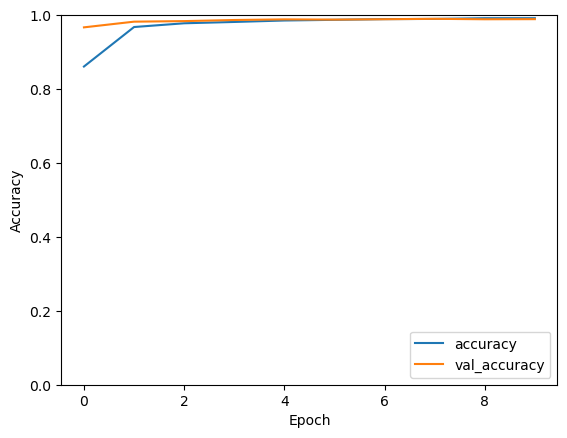

In [18]:
# Plot training history
plt.plot(cnn_history.history['accuracy'], label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0344 - accuracy: 0.9901 - 537ms/epoch - 2ms/step

Test accuracy: 0.9901000261306763


313/313 [==============================] - 1s 2ms/step


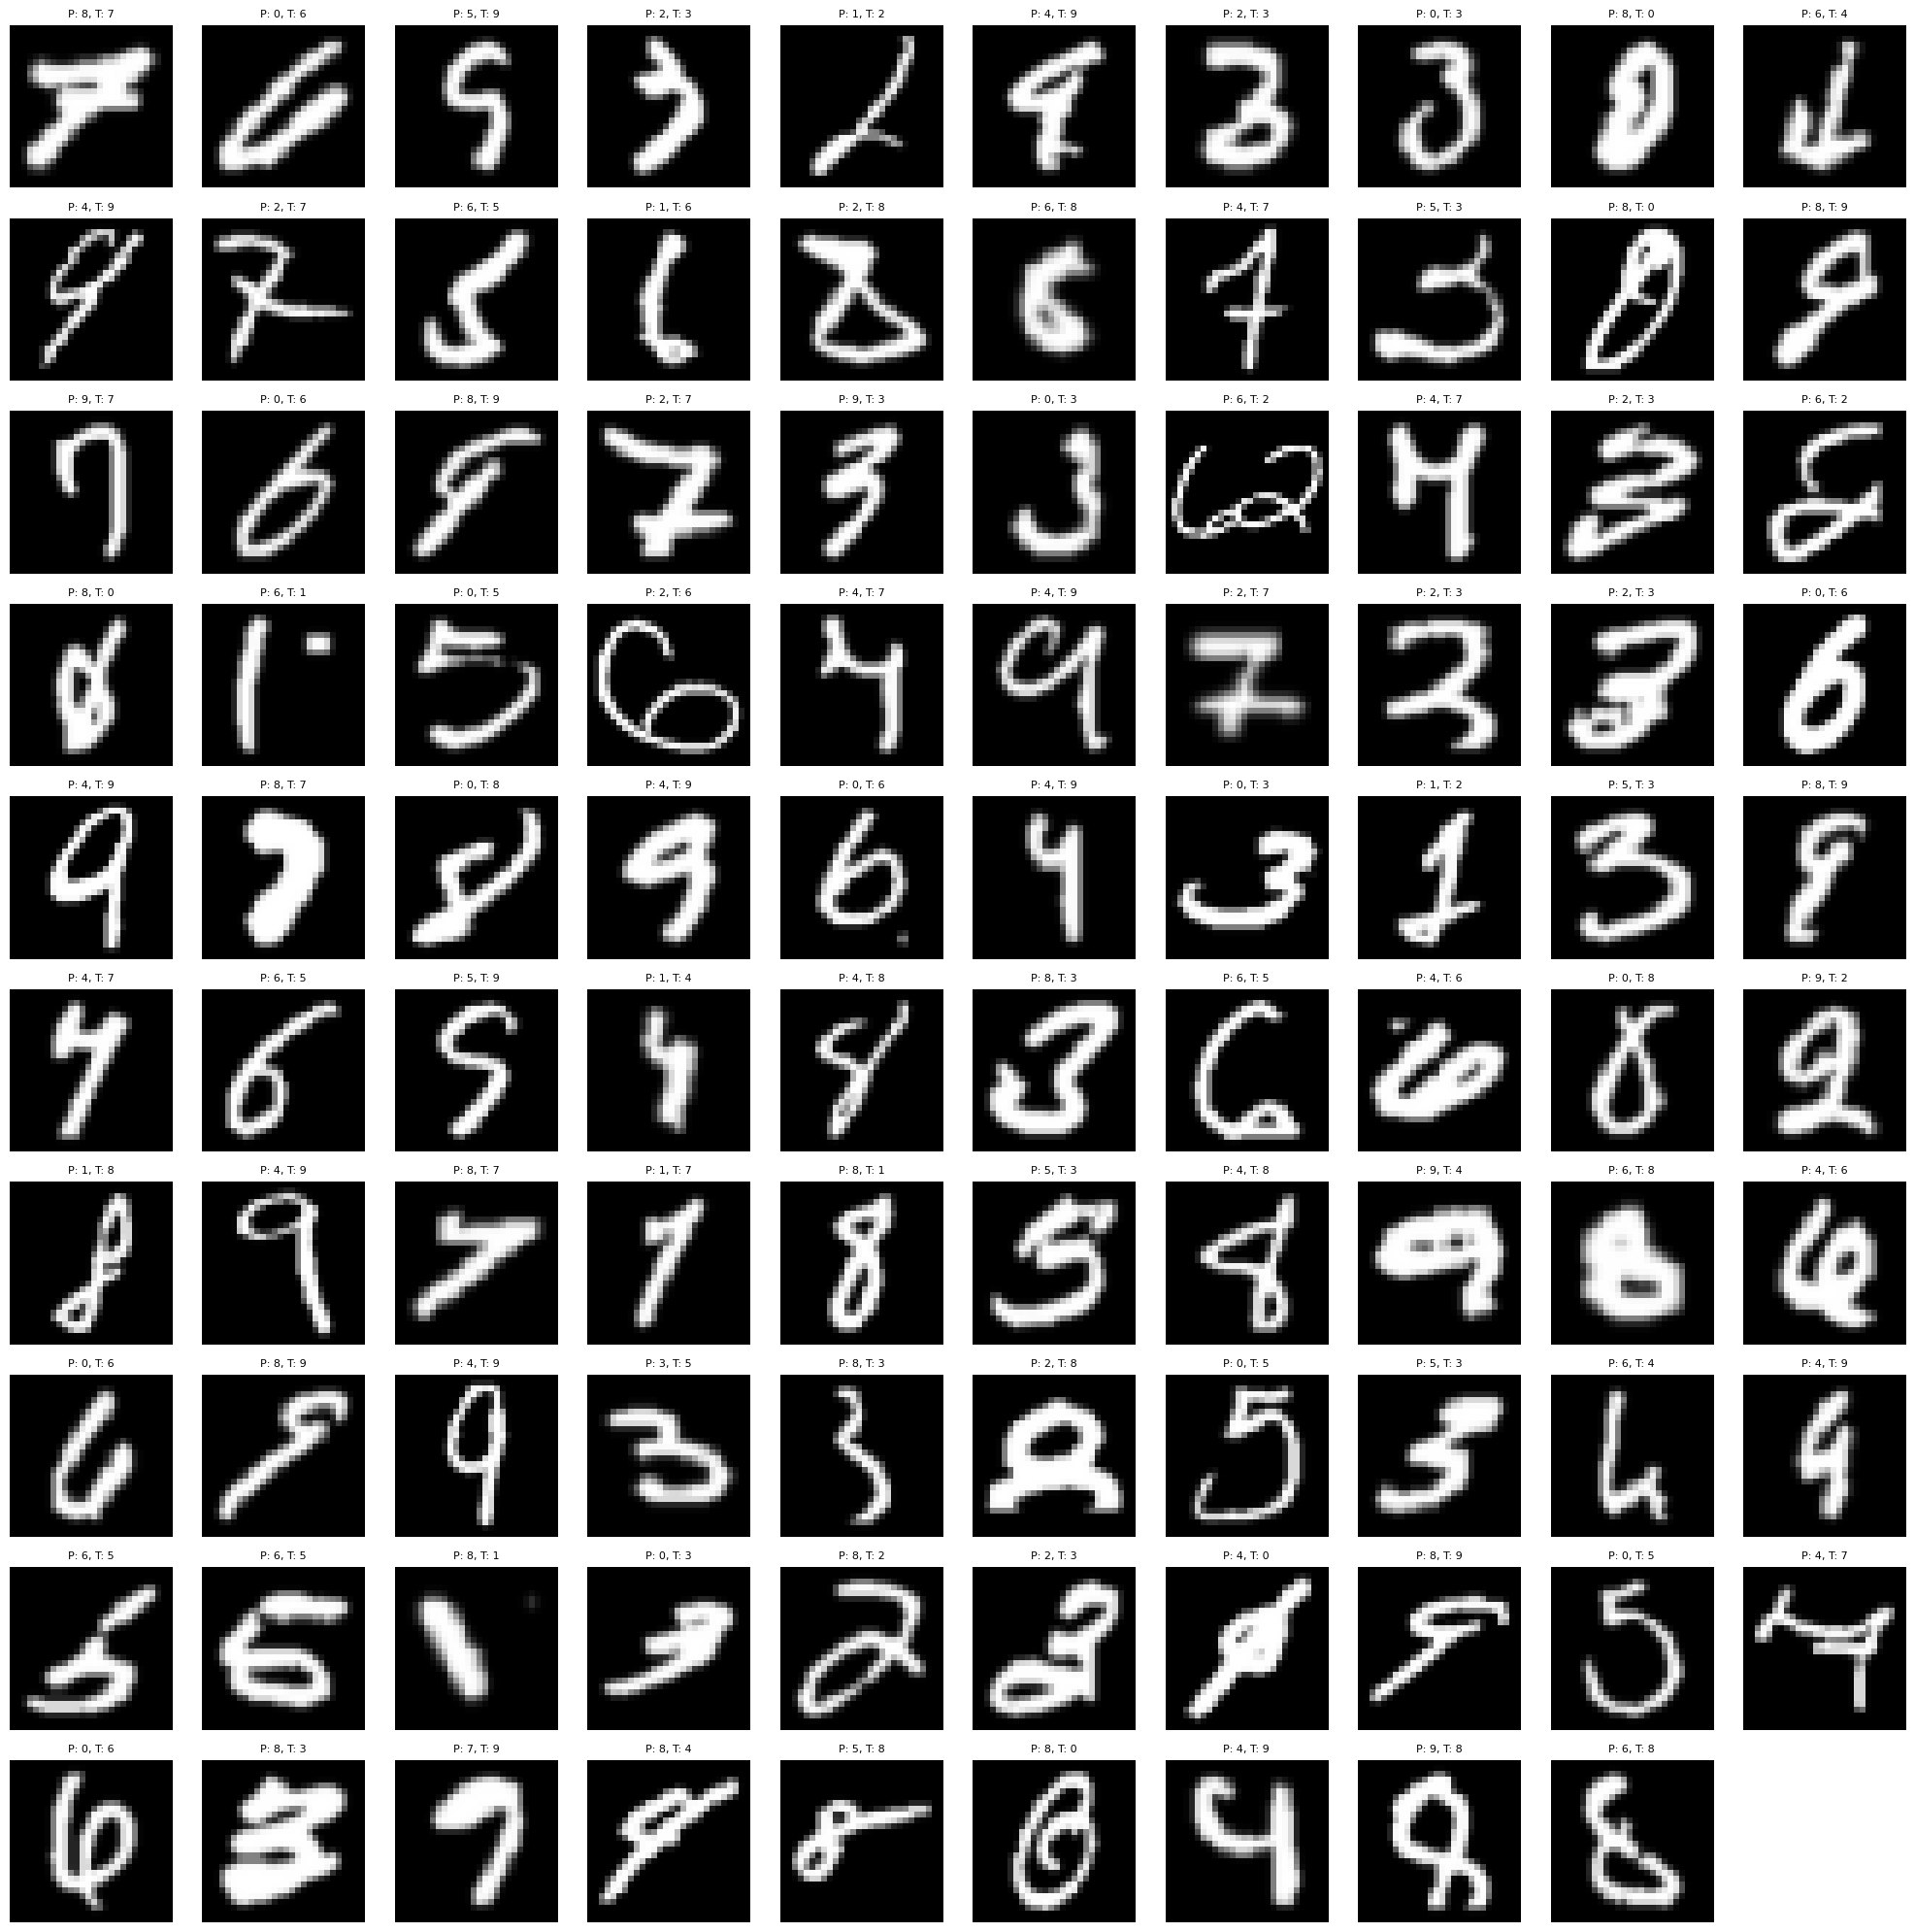

In [20]:
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = cnn_model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify the indices of misclassified examples
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Function to visualize misclassified examples
def plot_misclassified(indexes, y_pred_classes, y_true, images, rows=10, cols=10):
    """Plots a selection of the misclassified images in grid format."""
    n = len(indexes)
    if n > rows*cols:
        print(f"Displaying first {rows*cols} out of {n} misclassified examples.")
        n = rows*cols
    
    plt.figure(figsize=(2*cols, 2*rows))
    for i in range(n):
        idx = indexes[i]
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"P: {y_pred_classes[idx]}, T: {y_true[idx]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first few misclassified examples
plot_misclassified(misclassified_indices, y_pred_classes, y_true, x_test)

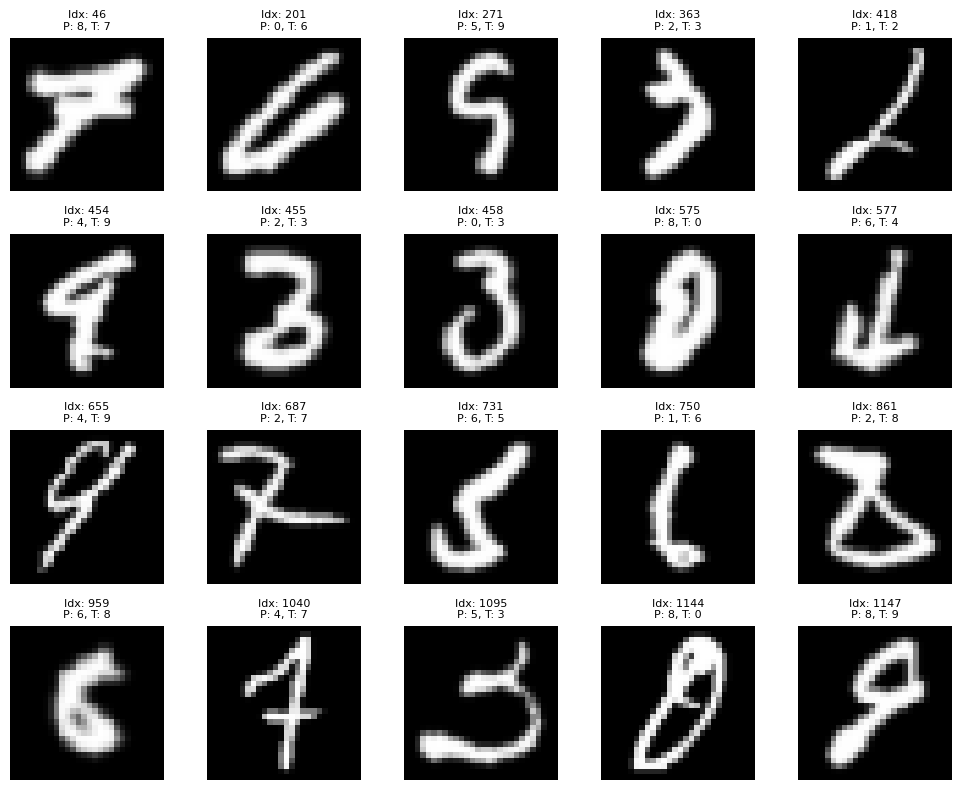

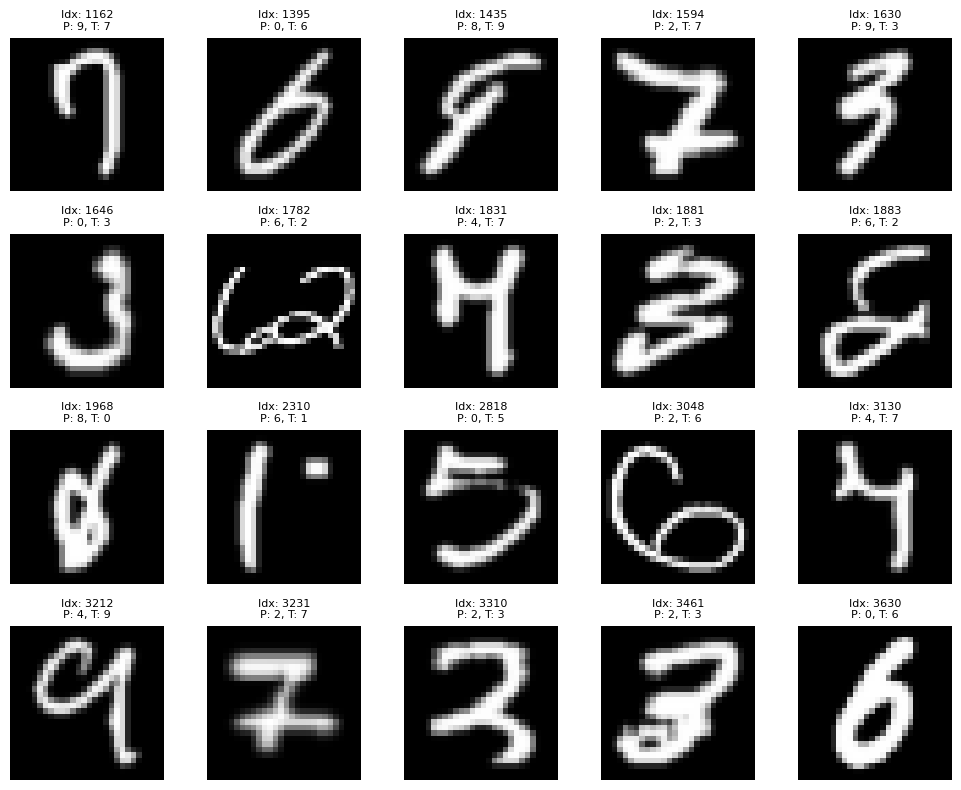

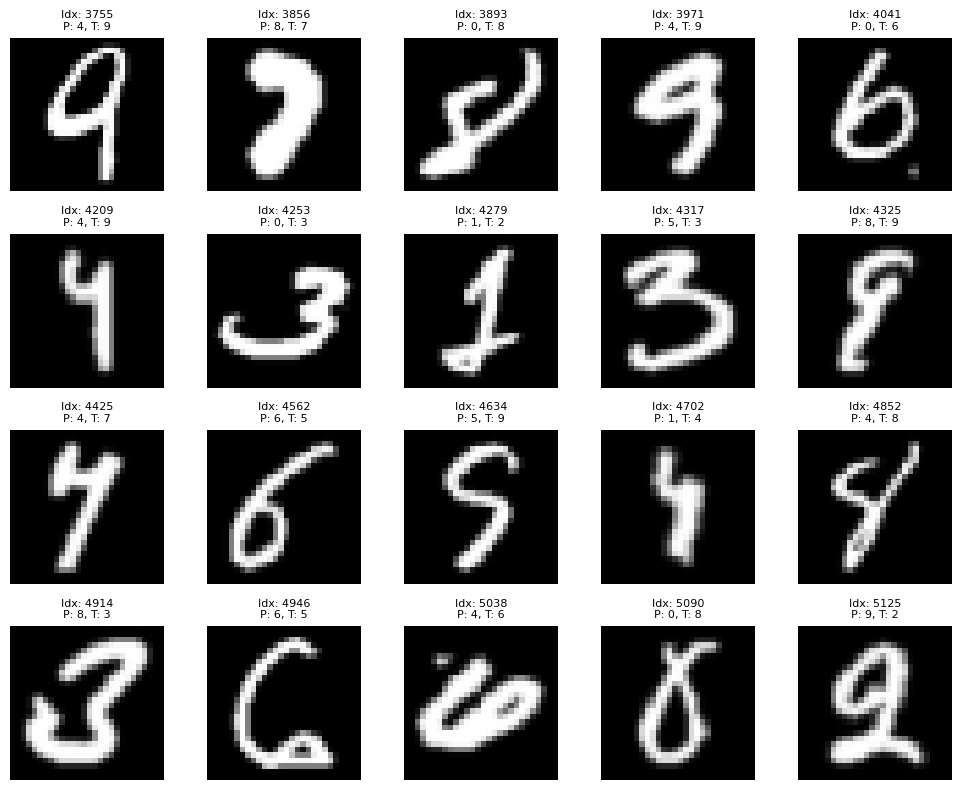

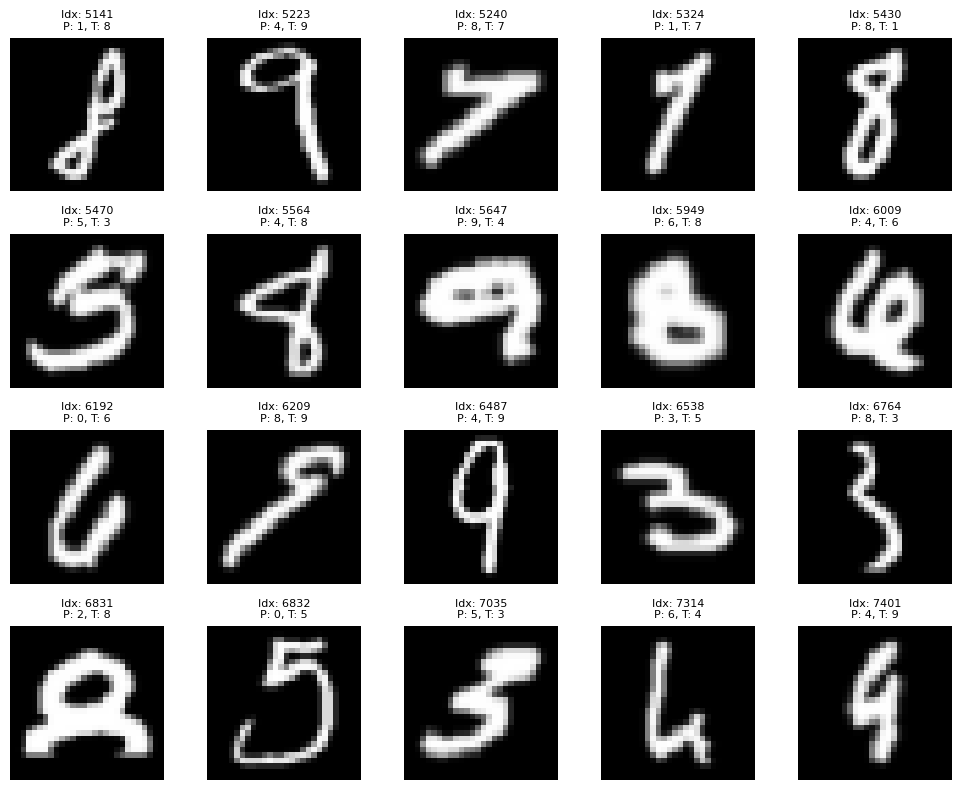

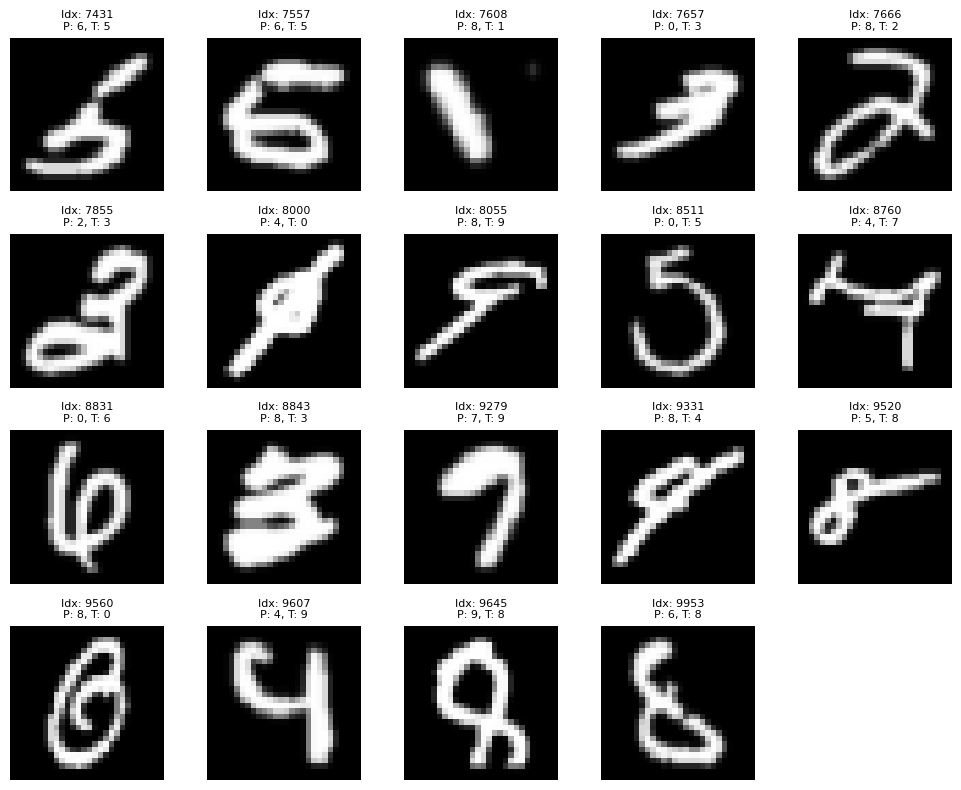

Total selected for removal: 30, Indices: [201, 271, 418, 577, 1095, 1162, 1782, 1831, 1883, 1968, 2310, 2818, 3130, 3461, 3310, 3856, 4209, 4425, 5125, 5038, 5090, 6764, 6831, 7314, 8760, 7666, 8000, 9560, 9645, 7557]


In [37]:
def plot_misclassified_batch(indexes, y_pred_classes, y_true, images, start=0, batch_size=20):
    """Plots a batch of the misclassified images in grid format."""
    end = start + batch_size
    batch_indexes = indexes[start:end]
    n = len(batch_indexes)
    
    cols = 5
    rows = n // cols + (n % cols > 0)
    
    plt.figure(figsize=(2*cols, 2*rows))
    for i, idx in enumerate(batch_indexes):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Idx: {idx}\nP: {y_pred_classes[idx]}, T: {y_true[idx]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return batch_indexes

indices_to_remove = []

start_index = 0
batch_size = 20  # Or any other size you prefer

# Continue processing in batches
while start_index < len(misclassified_indices):
    displayed_indices = plot_misclassified_batch(misclassified_indices, y_pred_classes, y_true, x_test, start=start_index, batch_size=batch_size)
    
    # Ensure the user understands the valid range
    # print(f"Enter indices to remove from this batch (0-{len(displayed_indices)-1}), separated by commas.")
    indices_input = input("Indices: ").strip()
    if indices_input:
        selected_batch_indices = [int(idx) for idx in indices_input.split(',') if idx.isdigit()]
        for batch_idx in selected_batch_indices:
            batch_idx = batch_idx - 1
            if batch_idx < len(displayed_indices):  # Ensure the index is within the current batch range
                actual_idx = displayed_indices[batch_idx]
                indices_to_remove.append(actual_idx)
            else:
                print(f"Index {batch_idx} is out of bounds for this batch.")
    
    continue_input = input("Continue to the next batch? (y/n): ").strip().lower()
    if continue_input != 'y':
        break
    
    start_index += batch_size

# Output for verification
print(f"Total selected for removal: {len(indices_to_remove)}, Indices: {indices_to_remove}")

In [38]:
# Total selected for removal: 30, Indices: [201, 271, 418, 577, 1095, 1162, 1782, 1831, 1883, 1968, 2310, 2818, 3130, 3461, 3310, 3856, 4209, 4425, 5125, 5038, 5090, 6764, 6831, 7314, 8760, 7666, 8000, 9560, 9645, 7557]

1,7,8,10,11,12,13,15,19,18
10,5,7,16,18,2

(1, 7, 8, 10, 11, 12, 13, 15, 19, 18)

In [39]:
import numpy as np

# Filter the dataset
x_test_filtered = np.delete(x_test, indices_to_remove, axis=0)
y_test_filtered = np.delete(y_test, indices_to_remove, axis=0)

# Save the filtered dataset
np.save('x_test_filtered.npy', x_test_filtered)
np.save('y_test_filtered.npy', y_test_filtered)

In [40]:
import os

def load_filtered_dataset(x_test_path='x_test_filtered.npy', y_test_path='y_test_filtered.npy'):
    """
    Tries to load filtered datasets if they exist.
    Returns the datasets if available, otherwise returns None.
    """
    if os.path.exists(x_test_path) and os.path.exists(y_test_path):
        x_test_filtered = np.load(x_test_path)
        y_test_filtered = np.load(y_test_path)
        print("Loaded filtered datasets.")
        return x_test_filtered, y_test_filtered
    else:
        print("Filtered datasets not found.")
        return None, None

# Usage
x_test_filtered, y_test_filtered = load_filtered_dataset()

Loaded filtered datasets.


In [42]:
x_test_cnn_filtered = x_test_filtered.reshape(x_test_filtered.shape[0], 28, 28, 1)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Train the CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 4s 23ms/step - loss: 0.0739 - accuracy: 0.9782 - val_loss: 0.0495 - val_accuracy: 0.9851
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0555 - accuracy: 0.9832 - val_loss: 0.0451 - val_accuracy: 0.9851
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0443 - val_accuracy: 0.9848
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0355 - val_accuracy: 0.9888
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0327 - val_accuracy: 0.9900
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0315 - val_accuracy: 0.9897

In [47]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0280 - accuracy: 0.9919 - 566ms/epoch - 2ms/step

Test accuracy: 0.9919000267982483


313/313 [==============================] - 1s 2ms/step


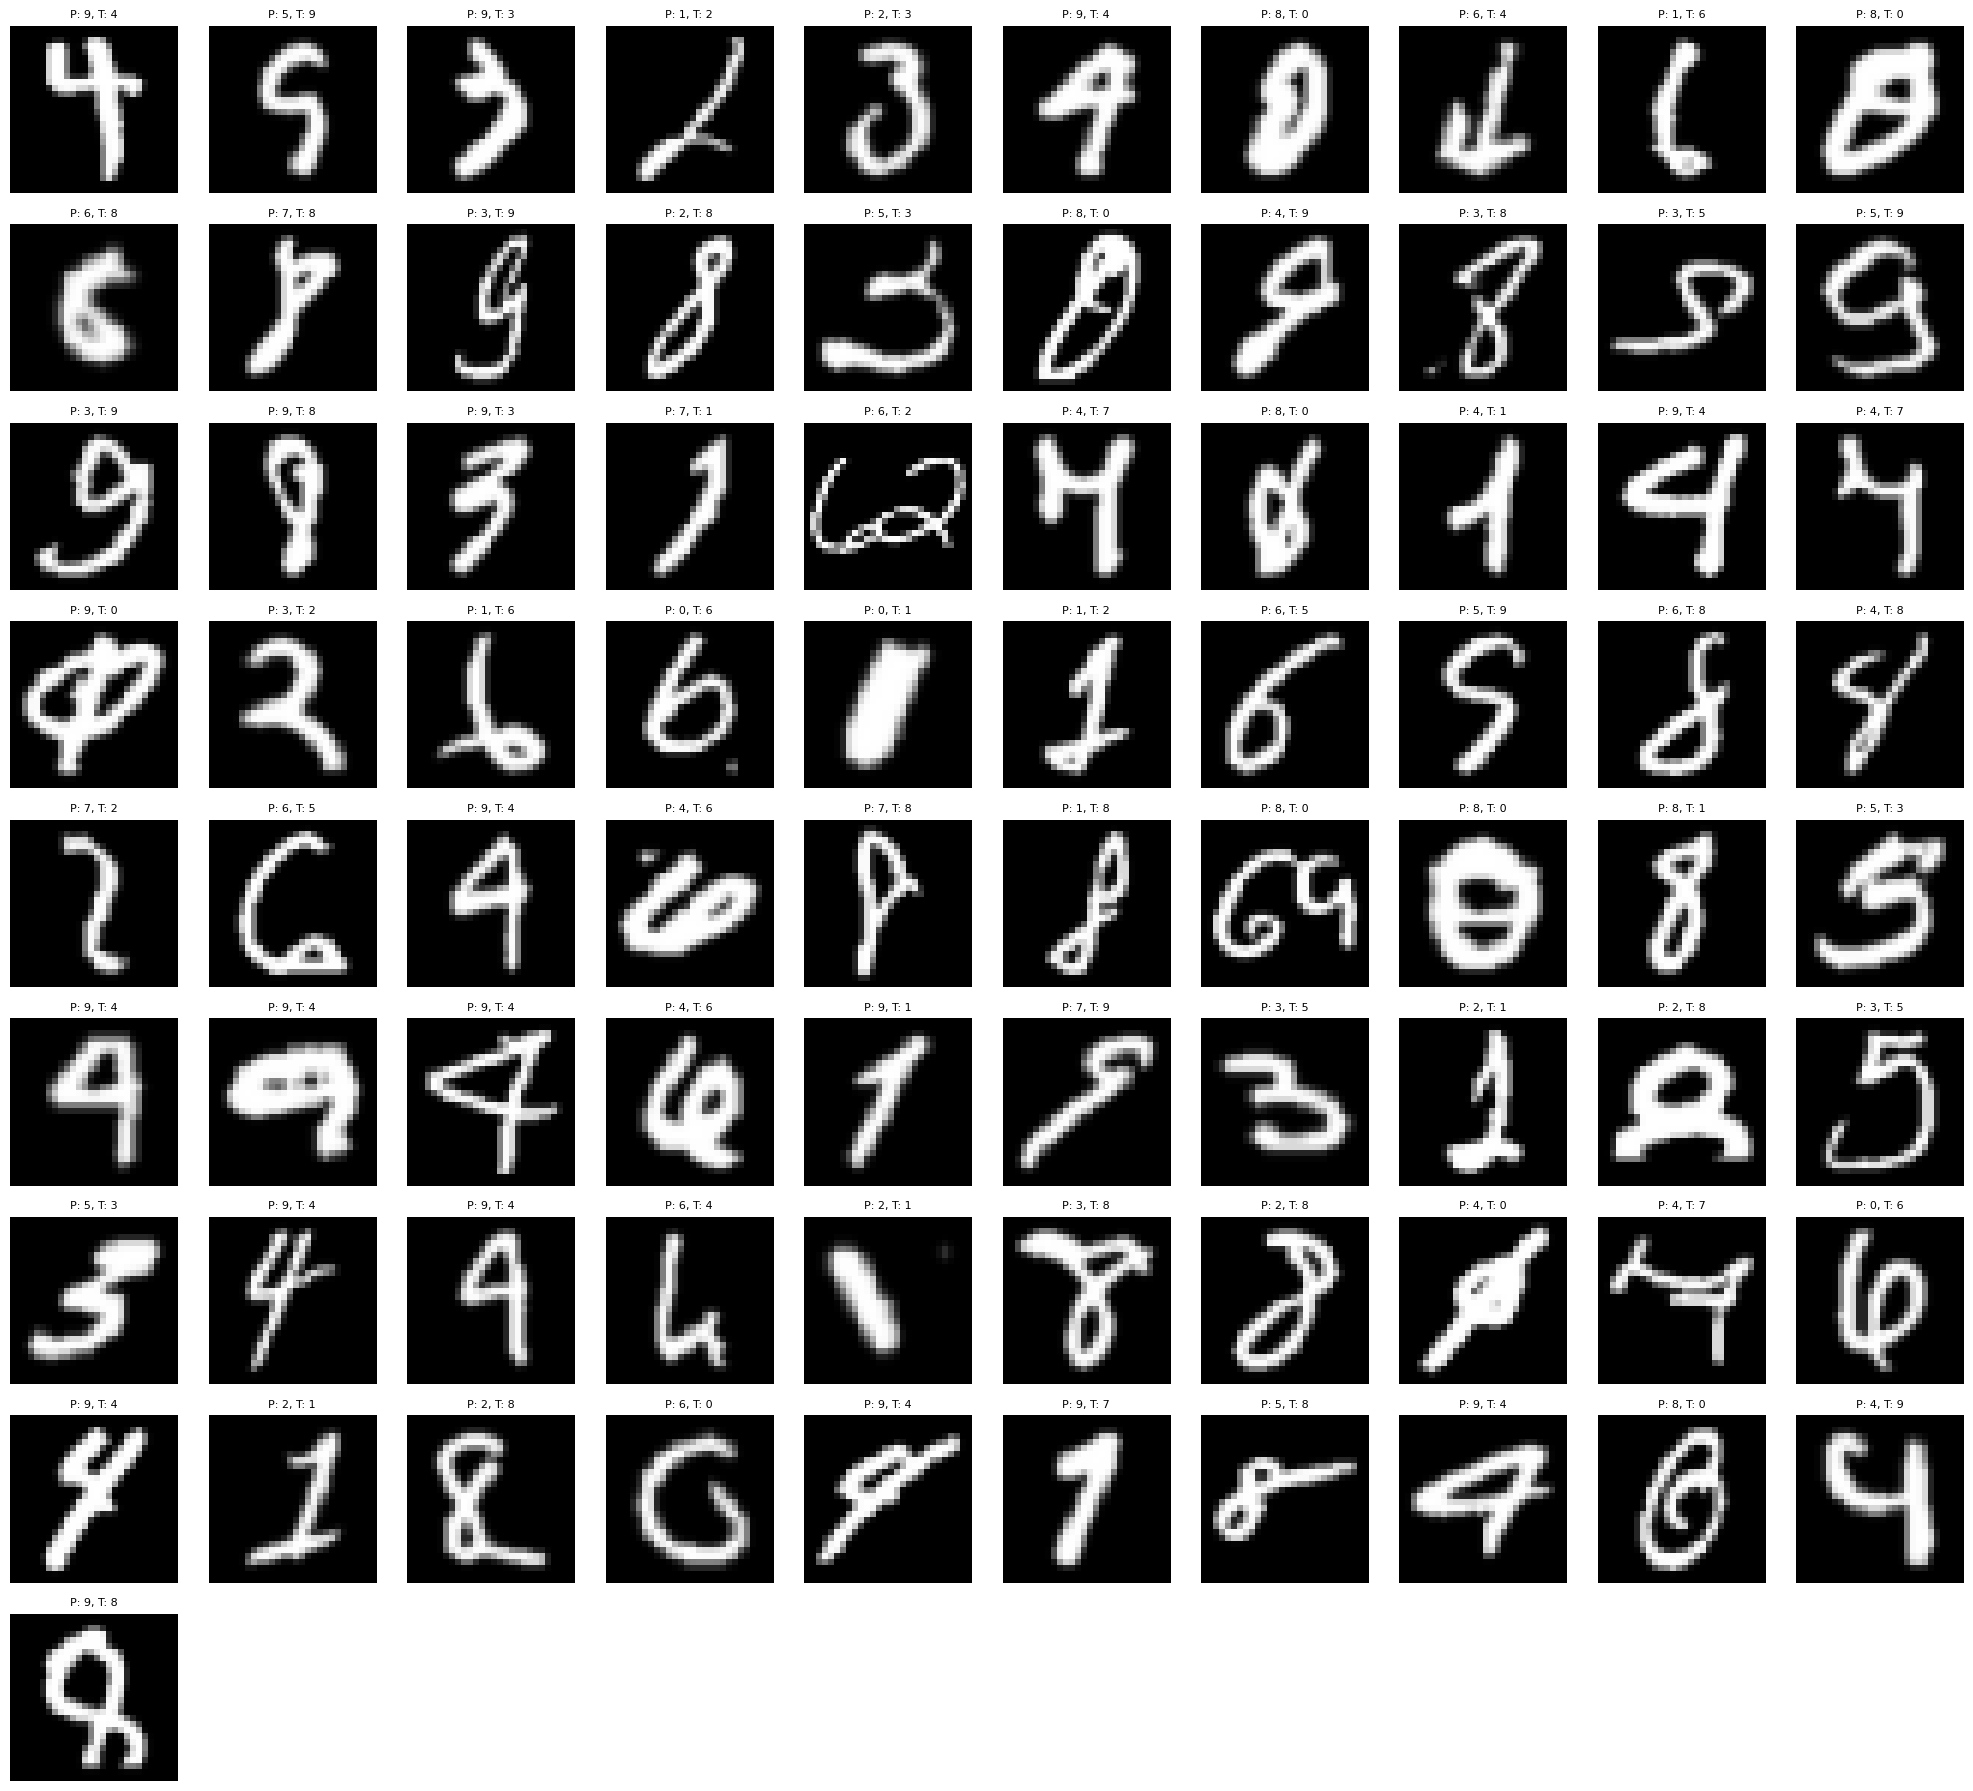

In [48]:
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = cnn_model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify the indices of misclassified examples
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Function to visualize misclassified examples
def plot_misclassified(indexes, y_pred_classes, y_true, images, rows=10, cols=10):
    """Plots a selection of the misclassified images in grid format."""
    n = len(indexes)
    if n > rows*cols:
        print(f"Displaying first {rows*cols} out of {n} misclassified examples.")
        n = rows*cols
    
    plt.figure(figsize=(2*cols, 2*rows))
    for i in range(n):
        idx = indexes[i]
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"P: {y_pred_classes[idx]}, T: {y_true[idx]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first few misclassified examples
plot_misclassified(misclassified_indices, y_pred_classes, y_true, x_test)

In [50]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Assuming `images` is your dataset and `labels` are your labels

def plot_images_in_batch(images, indices, rows=5, cols=5):
    """Displays a grid of images with checkboxes to select them for removal."""
    if len(indices) < rows * cols:
        print("Not enough images to fill the grid, displaying what's available.")
    
    fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
    checkboxes = []
    
    for i, ax in enumerate(axs.flat):
        if i < len(indices):
            idx = indices[i]
            ax.imshow(images[idx].reshape(28, 28), cmap='gray')
            ax.set_title(f"Index: {idx}")
            ax.axis('off')
            
            # Checkbox for each image
            checkbox = widgets.Checkbox(value=False, description='Remove')
            display(checkbox)
            checkboxes.append((idx, checkbox))
        else:
            ax.axis('off')
    
    plt.tight_layout()
    return checkboxes

def update_dataset(images, labels, checkboxes):
    """Updates the dataset by removing selected images and labels."""
    indices_to_remove = [idx for idx, checkbox in checkboxes if checkbox.value]
    print(f"Removing {len(indices_to_remove)} images...")
    
    # Remove the selected images and labels
    images = np.delete(images, indices_to_remove, axis=0)
    labels = np.delete(labels, indices_to_remove, axis=0)
    
    return images, labels

# Example usage:
indices = np.random.choice(range(len(images)), 25, replace=False) # Randomly select images to display
checkboxes = plot_images_in_batch(images, indices)

# Button to remove selected images and update the dataset
remove_button = widgets.Button(description="Remove Selected Images")

def on_remove_button_clicked(b):
    global images, labels
    images, labels = update_dataset(images, labels, checkboxes)
    clear_output()
    print("Dataset updated. Displaying new batch...")
    # You can add code here to display a new batch of images

remove_button.on_click(on_remove_button_clicked)
display(remove_button)

Dataset updated. Displaying new batch...
